# Persistence of hydrogen bonds during MD replicas

In [5]:
import numpy as np
from oxDNA_analysis_tools.UTILS.RyeReader import describe, get_confs, inbox
import glob
import os

import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

import pandas as pd
import sys
from scipy.ndimage import uniform_filter1d, gaussian_filter, uniform_filter
from pycirclize import Circos

#sys.path.append('/Volumes/Elements/PhD/Projects/04_CCMV_RNA2Relaxation/01_MacromolecularRapidComm_paper/ANALYSIS/src')
from mainfunctions import read_HB_file

### Print chord diagram for each MD replica

In [6]:
# General info about the simulation
Salt = 0.45 
nbases = 38
s = ['min','med','max']
lb = ['I','II','III']
Ends = 'harmonic'

# Filter on HB persistence
contact_filt = 0.5 # Percentage of contacts preserved during the MD trajectory

SavePath = './'

for replica,Scenario in enumerate(s):

    # Working path
    SimPath = './'
    WorkPath = './'

    # Setup contact maps matrix
    ContactMap = np.zeros((nbases,nbases))
    
    HB = {}; HB = read_HB_file(f'./../RNA2_HB_PerFrame.dat')

    for j in HB.values():
        if j!=[]: 
            for i in j: ContactMap[i[0],i[1]] += 1

    TotalFrames = 0; TotalFrames = len(HB.keys())
    ContactMap/=TotalFrames

    # Pandas dataframe conversion for Circos (visit: https://moshi4.github.io/pyCirclize/plot_api_example/)
    df = []
    df = pd.DataFrame(ContactMap)
    df = df.stack().reset_index()
    df.columns = ['idx1', 'idx2', 'value']
    df = df[df['value'] > contact_filt ]
    df = df.reset_index(drop=True)
    df = df.reset_index()
 
    clr = [k for k in df['value']]

    fig = []; sectors = {}; circos = []; track = []
    
    # Plot chord diagram
    cmap_name = 'RdBu_r'
    cmap = plt.get_cmap(cmap_name)
    norm = Normalize(vmin=contact_filt, vmax=1)

    name2color = {"A": "grey"}
    sectors = {f"A":n for n in np.arange(0,nbases)}
    circos = Circos(sectors, space=360/nbases)

    k = 0
    for i,j in zip(df['idx1'][1:],df['idx2'][1:]):
        circos.link((f"A", i,i-1e-5), (f"A", j,j-1e-4), color = cmap( norm(clr) )[k ], lw=1 )
        k+=1

    for sector in circos.sectors:
        track = sector.add_track((95, 100))
        track.axis(fc = name2color[sector.name])
        track.xticks_by_interval(75)

    fig = circos.plotfig(dpi=600, figsize=(6, 6))
    plt.title(f'{Salt} M | ({lb[replica]})', fontsize = 15)

    # Create a mappable object for the colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar_ax = fig.add_axes([1.05, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label(f'Persistence of hydrogen bonding interaction') 

    # Save the figure
    plt.savefig('./One_replica.pdf', format='pdf')
    plt.clf()

/var/folders/q9/3_m1wtjn48qcqpr12gdycyhc0000gn/T/ipykernel_4077/1756199901.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('./One_replica.pdf', format='pdf')
/var/folders/q9/3_m1wtjn48qcqpr12gdycyhc0000gn/T/ipykernel_4077/1756199901.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('./One_replica.pdf', format='pdf')
/var/folders/q9/3_m1wtjn48qcqpr12gdycyhc0000gn/T/ipykernel_4077/1756199901.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('./One_replica.pdf', format='pdf')


<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

### Average over the all independet replicas

/var/folders/q9/3_m1wtjn48qcqpr12gdycyhc0000gn/T/ipykernel_4077/3144678973.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('All_replicas.pdf', format='pdf')


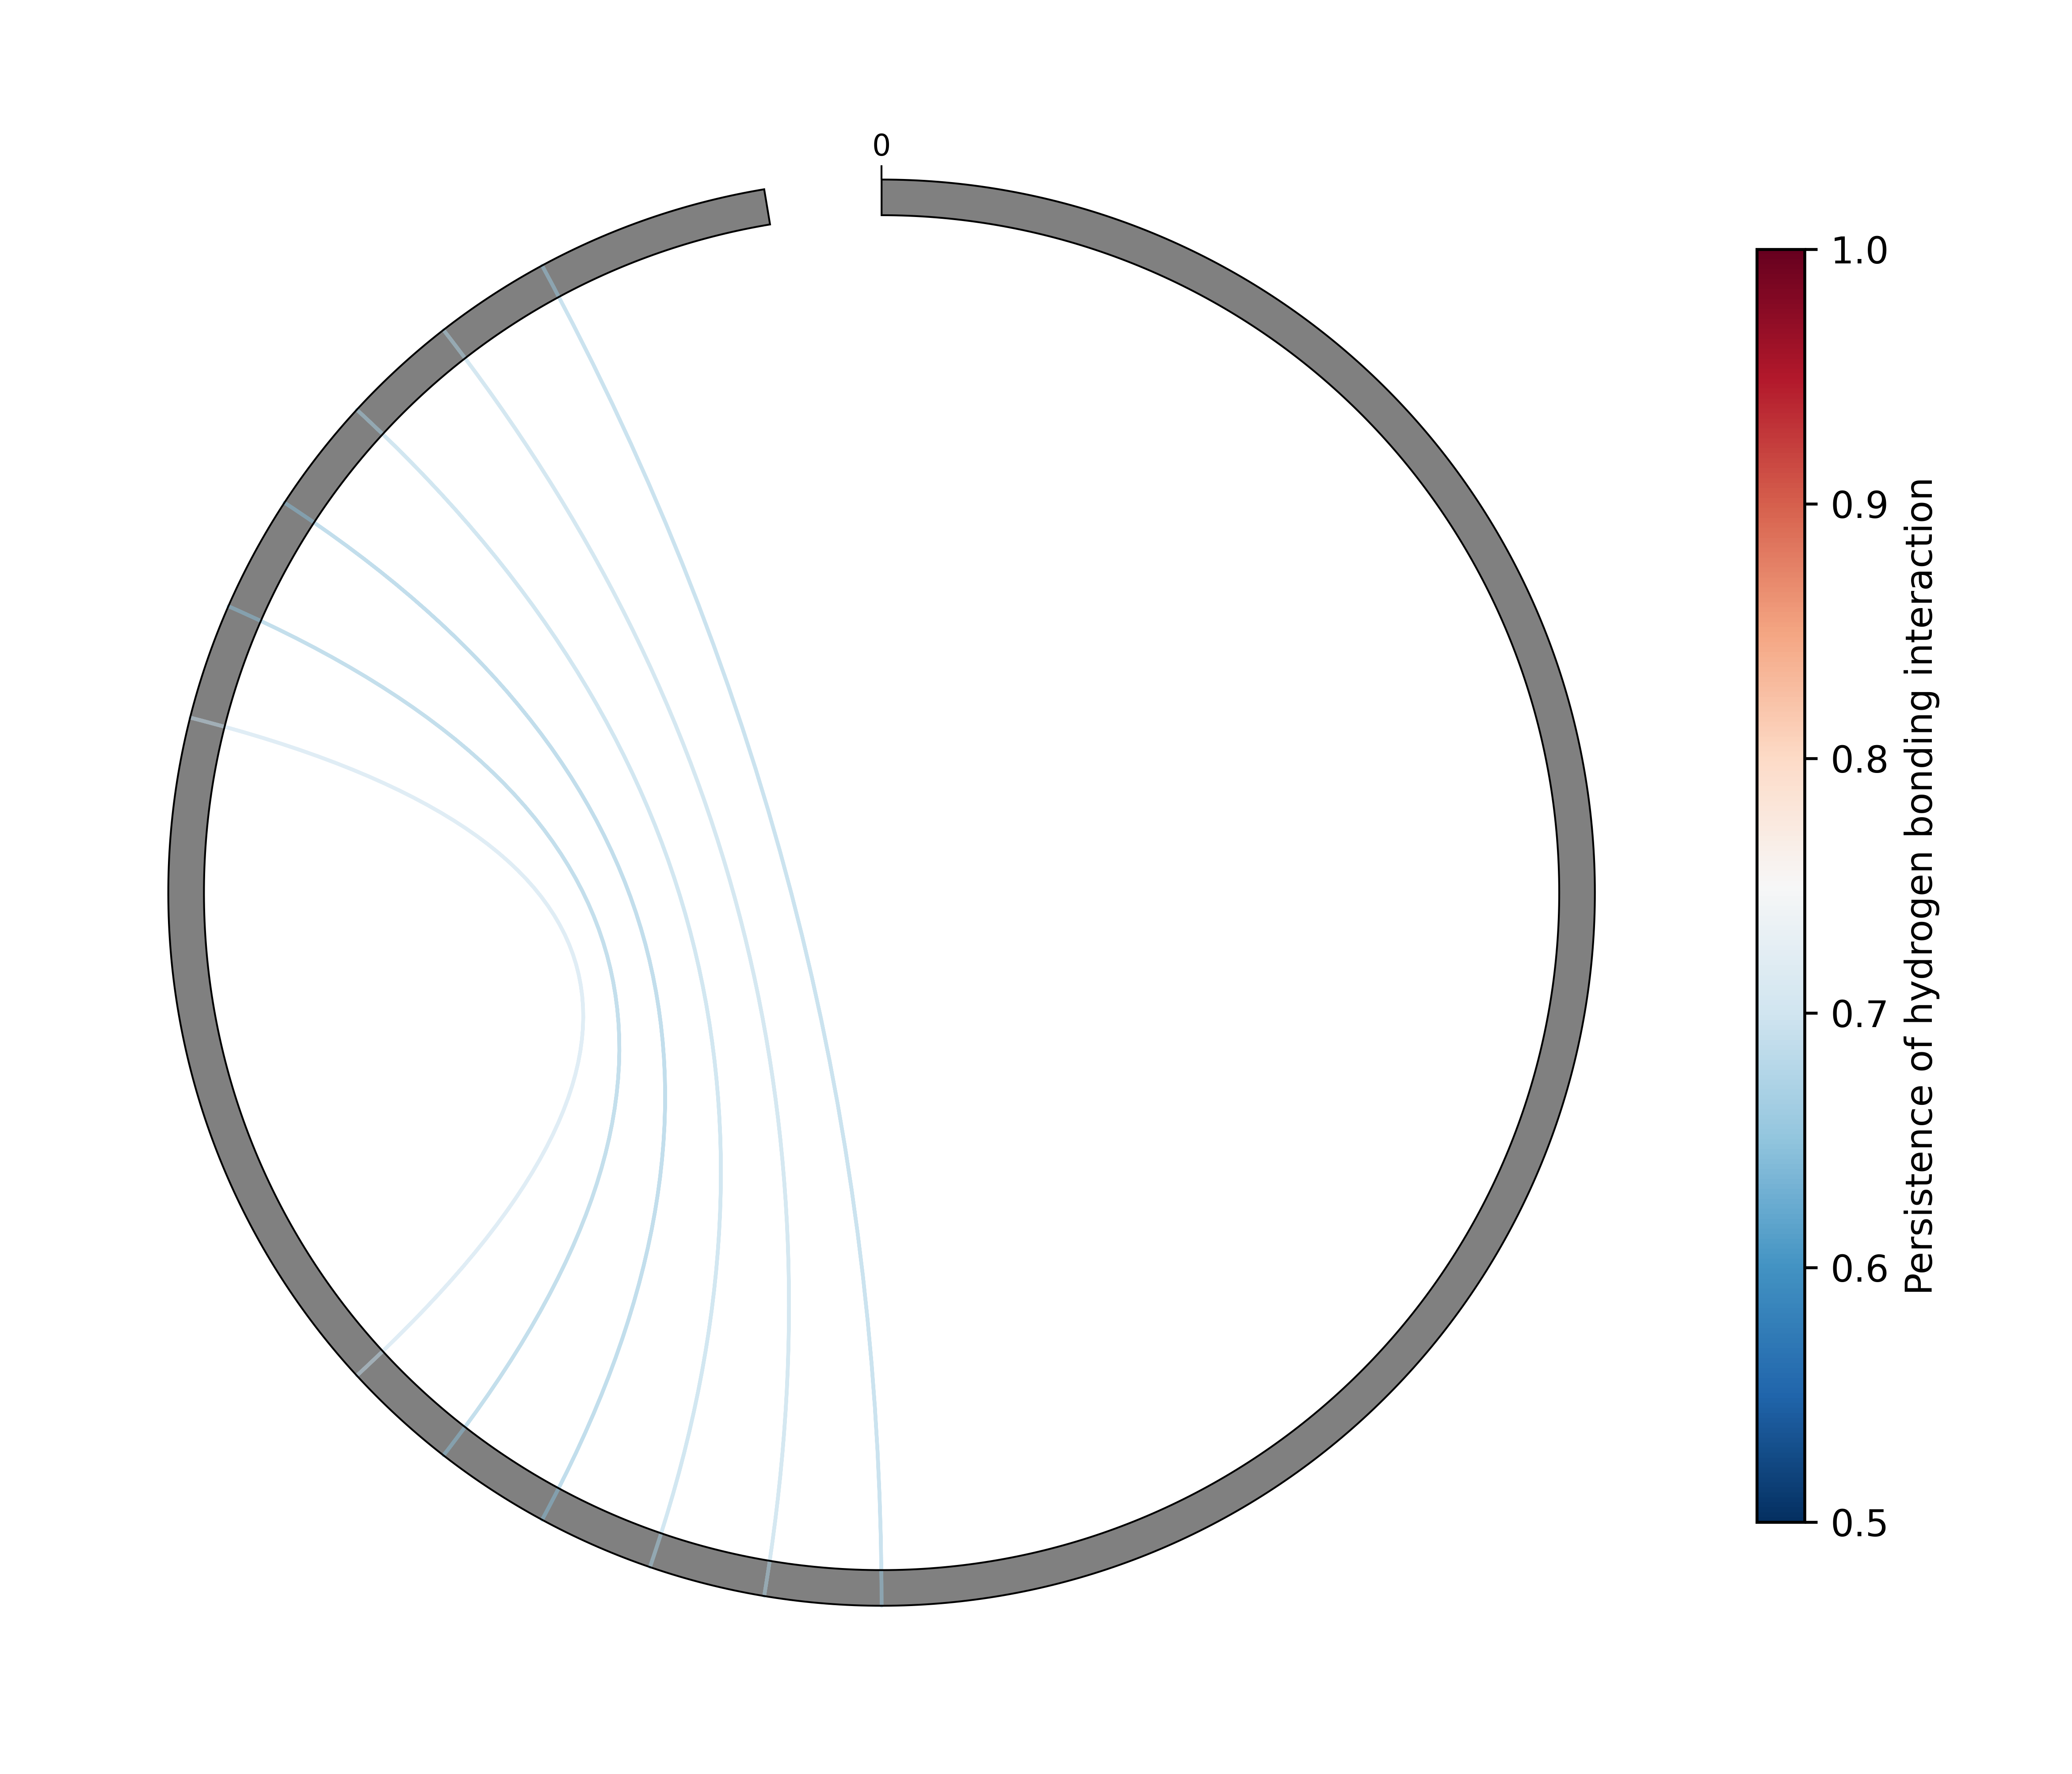

In [7]:
Salt = 0.45
s = ['min','med','max'] 
nbases = 38
contact_filt = 0.5
Ends = 'free'

SavePath = './'

ContactMap = np.zeros((nbases,nbases))
TotalFrames = 0

for replica,Scenario in enumerate(s):
    SimPath = './'
    WorkPath = './'

    HB = {}; HB = read_HB_file(f'./../RNA2_HB_PerFrame.dat')
    for j in HB.values():
        if j!=[]: 
            for i in j: ContactMap[i[0],i[1]] += 1
    TotalFrames += len(HB.keys())

ContactMap/=TotalFrames

# Pandas dataframe conversion
df = []
df = pd.DataFrame(ContactMap)
df = df.stack().reset_index()
df.columns = ['idx1', 'idx2', 'value']
df = df[df['value'] > contact_filt ]
df = df.reset_index(drop=True)
df = df.reset_index()

clr = [k for k in df['value']]

fig = []; sectors = {}; circos = []

# Plot chord diagram
cmap_name = 'RdBu_r'
cmap = plt.get_cmap(cmap_name)
norm = Normalize(vmin=contact_filt, vmax=1)

name2color = {"A": "grey"}
sectors = {f"A":n for n in np.arange(0,nbases)}
circos = Circos(sectors, space=360/nbases)

k = 0
for i,j in zip(df['idx1'][1:],df['idx2'][1:]):
    circos.link((f"A", i,i-1e-5), (f"A", j,j-1e-4), color = cmap( norm(clr) )[k ], lw=1 )
    k+=1

for sector in circos.sectors:
    track = sector.add_track((95, 100))
    track.axis(fc = name2color[sector.name])
    track.xticks_by_interval(75)

fig = circos.plotfig(dpi=600, figsize=(6, 6))

# Create a mappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([1.05, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(f'Persistence of hydrogen bonding interaction')  # Replace 'Value Legend' with your desired label

# Save the figure
plt.savefig('All_replicas.pdf', format='pdf')